#NutriScore

## Neural Network

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization

In [19]:
data = pd.read_csv('../data/train_final.csv')

In [49]:
# Remove specified columns from the data and make a copy
columns_to_remove = [
    'energy_points', 'sugars_points', 'saturated_fat_points', 'salt_points',
    'fruits_points', 'fiber_points', 'proteins_points', 'total_negative_points',
    'total_positive_points', 'total_score'
]

data_copy = data.drop(columns=columns_to_remove).copy()
data_copy['nutriscore_grade'] = data_copy['nutriscore_grade'].map({1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'})

data_copy.head(20)

,product_name,energy-kcal_100g,sugars_100g,saturated-fat_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,fiber_100g,proteins_100g,nutriscore_grade
0,Veganes Protein Vanille,384.0,0.30,0.2,0.80000,0.000000,4.9,74.10,B
1,Formula 1 healthy meal,380.0,13.00,1.8,1.30000,0.000172,20.0,40.00,D
2,Organic Coconut Sparkling Spring Water,0.0,0.00,0.0,0.00000,0.000000,0.0,0.00,A
3,Sparkling water,0.0,0.00,0.0,0.00000,0.000000,0.0,0.00,A
4,"Ryan's, Lemonade",54.0,13.33,0.0,0.01000,15.832500,0.0,0.00,C
5,Apple cider,46.0,8.33,0.0,0.01500,0.000000,0.0,0.42,C
6,"Pumpkin pie flavored apple cider drink, pumpki...",58.0,12.92,0.0,0.00000,18.750000,0.0,0.00,C
7,Caramel flavor apple cider drink,54.0,12.50,0.0,0.00000,0.000000,0.0,0.00,C
8,100% apple cider juice,46.0,8.33,0.0,0.01500,100.000000,0.0,0.42,B
9,Core Hydration Water,0.0,0.00,0.0,0.00000,0.000000,0.0,0.00,A


In [20]:
# Encode the target variable
label_encoder = LabelEncoder()
data['nutriscore_grade'] = label_encoder.fit_transform(data['nutriscore_grade'])

In [21]:
# Define features and target
X = data[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'salt_100g',
          'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g']]
y = data['nutriscore_grade']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Convert data to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Define the normalization layer
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(X_train)  # Compute mean and variance from the training set

In [26]:
# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with explicit shape
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
]

In [29]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6667 - loss: 1.1860 - val_accuracy: 0.8711 - val_loss: 0.4358
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8829 - loss: 0.3763 - val_accuracy: 0.9019 - val_loss: 0.3272
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9049 - loss: 0.2937 - val_accuracy: 0.9111 - val_loss: 0.2798
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9136 - loss: 0.2586 - val_accuracy: 0.9216 - val_loss: 0.2450
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9179 - loss: 0.2272 - val_accuracy: 0.9275 - val_loss: 0.2178
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9300 - loss: 0.2001 - val_accuracy: 0.9328 - val_loss: 0.1961
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9348 - loss: 0.1819 - val_accuracy: 0.9364 - val_loss: 0.1833
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9349 - loss: 0.1804 - val_accu

In [34]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

val_accuracy = history.history['val_accuracy'][-1]  #
val_loss = history.history['val_loss'][-1]  
print(f'Validation accuracy: {val_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}')


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1077
Test accuracy: 0.9602
Test loss: 0.0988
Validation accuracy: 0.9644
Validation loss: 0.1092


In [ ]:
# Save the full model in .h5 format
model.save('final_nutriscore_model_2.h5')
print("Final model saved as 'final_nutriscore_model.h5'.")

Final model saved as 'final_nutriscore_model.h5'.


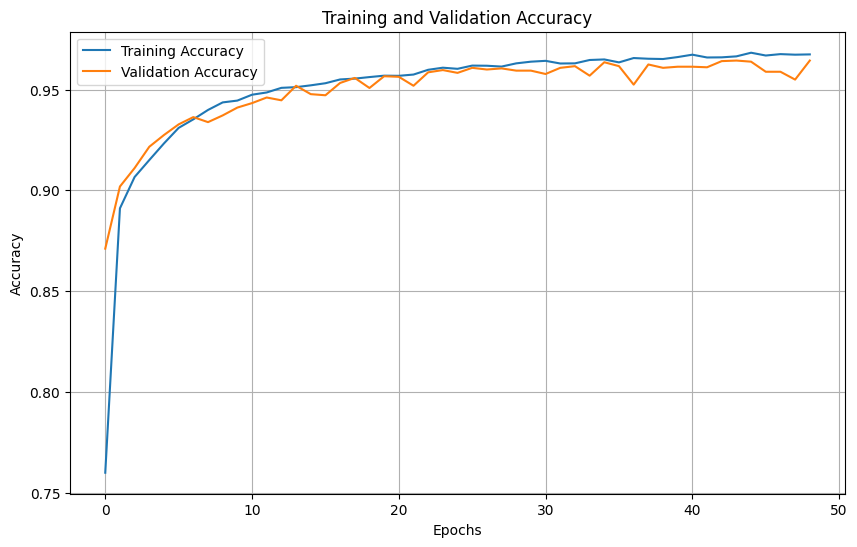

In [31]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

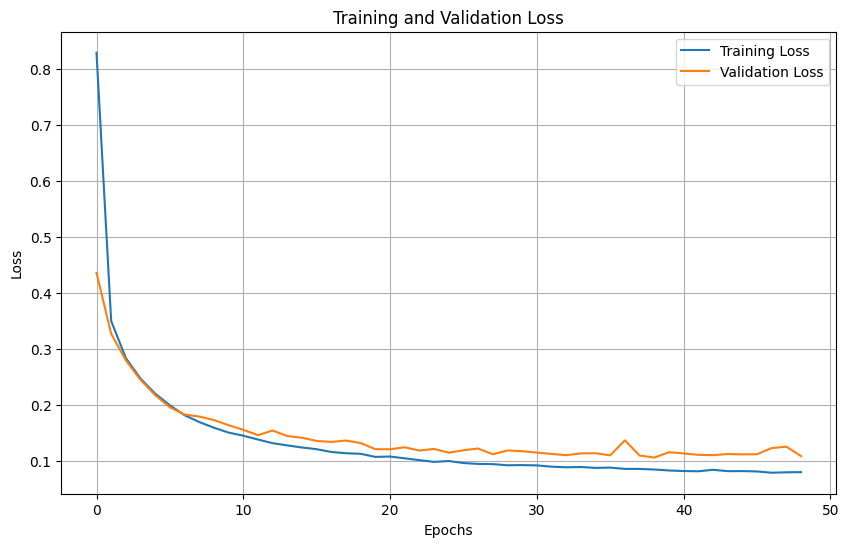

In [33]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()